# Compare Clustering Models

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is *clustering*, which is similar conceptually to *classification*, except that the the training data does not include known values for the class label to be predicted. Clustering works by separating the training cases based on similarities that can be determined from their feature values. The numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space. What a clustering model seeks to do is to identify groups, or *clusters*, of entities that are close to one another while being separated from other clusters.

In [1]:
import urllib.request
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv"

# Download the file
urllib.request.urlretrieve(url, "seeds.csv")

# Assuming the file is downloaded correctly
seeds = pd.read_csv('seeds.csv')

# Group column names
features = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry_coefficient", "groove_length"]
labels = ['species']

seeds.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


As you can see, the dataset contains 7 features for each species of a seed. So you could interpret these as coordinates that describe each instance's location in seven-dimensional space.

Seven-dimensional space is difficult to visualize in a three-dimensional world, or on a two-dimensional plot. To address this, We'll take advantage of a mathematical technique called *Principal Component Analysis* (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the seven-dimensional feature values into two-dimensional coordinates.

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalise the numerical values between 0 and 1
scaled_features = MinMaxScaler().fit_transform(seeds[features])

# Reduce the n_dimensions down to 2
features_2d = PCA(n_components=2).fit_transform(scaled_features)
features_2d[:10]


array([[ 0.07502933,  0.12969116],
       [-0.02430059,  0.36411968],
       [-0.14937464,  0.45649725],
       [-0.18088051,  0.44055742],
       [ 0.25058879,  0.44129658],
       [-0.11363851,  0.36902075],
       [-0.04378114,  0.10966172],
       [-0.13412921,  0.31501281],
       [ 0.43988919,  0.00147033],
       [ 0.35028428,  0.18923482]])

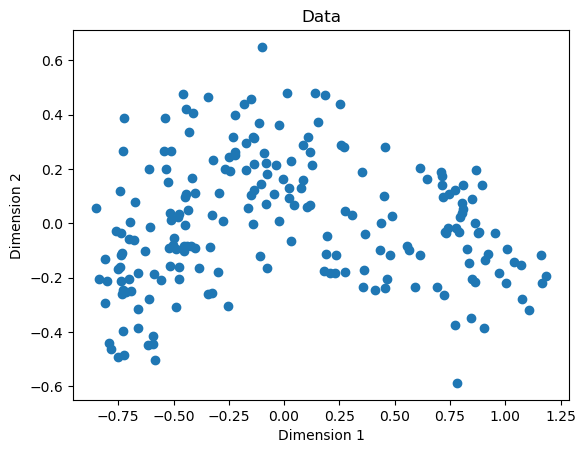

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualise the 2-dimensions in a plot
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

We are now seeking to separate this data into distinct clusters and that brings one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the *within cluster sum of squares* (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

In [ ]:
#importing the libraries
import numpy as np
from sklearn.cluster import KMeans

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_init=10, n_clusters = i, random_state=42)
    # Fit the data points
    kmeans.fit(seeds.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.


# Types of clustering

## KMeans
There are multiple algorithms you can use for clustering. One of the most commonly used algorithms is K-Means clustering that, in its simplest form, consists of the following steps:

1. A set of K centroids are randomly chosen.
2. Clusters are formed by assigning the data points to their closest centroid.
3. The mean of each cluster is computed and the centroid is moved to the mean.
4. Steps 2 and 3 are repeated until a stopping criteria is met. Typically, the algorithm terminates when each new iteration results in negligible movement of centroids and the clusters become static.
5. When the clusters stop changing, the algorithm has converged, defining the locations of the clusters. Note that the random starting point for the centroids means that re-running the algorithm could result in slightly different clusters, so training usually involves multiple iterations, re-initializing the centroids each time, and the model with the best WCSS (within cluster sum of squares) is selected.

In [25]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1000)

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(seeds.values)

# View the cluster assignments
km_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [26]:
# Now, let's see those cluster assignments with the two-dimensional data points.

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
        
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], 
                    samples[sample][1], 
                    color = colors[sample], 
                    marker=markers[sample], 
                    s=40)
    
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()


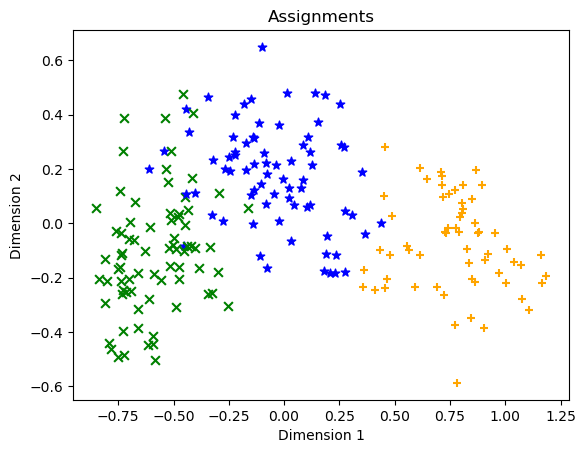

In [20]:
# Plot clusters for the predictions
plot_clusters(features_2d, km_clusters)

So what's the practical use of clustering? In some cases, you'll have data that you need to group into distinct clusters without knowing how many clusters there are or what they indicate. For example, a marketing organization might want to separate customers into distinct segments, and then investigate how those segments exhibit different purchasing behaviors.

Sometimes, clustering is used as an initial step towards creating a classification model. You start by identifying distinct groups of data points, and then assign class labels to those clusters. You can then use this labelled data to train a classification model.

In the case of the seeds data, the different species of seed are already known and encoded as 0 (*Kama*), 1 (*Rosa*), or 2 (*Canadian*), so we can use these identifiers to compare the species classifications to the clusters identified by our unsupervised algorithm.

## Hierarchical Clustering

Hierarchical clustering methods make fewer distributional assumptions when compared to K-Means methods. However, K-Means methods are generally more scalable, sometimes very much so.

Hierarchical clustering creates clusters by using either a *divisive* method or an *agglomerative* method. The divisive method is a "top down" approach starting with the entire dataset and then finding partitions in a stepwise manner. Agglomerative clustering is a "bottom up" approach. It works as follows:

1. The linkage distances between each of the data points are computed.
2. Points are clustered pairwise with their nearest neighbor.
3. Linkage distances between the clusters are computed.
4. Clusters are combined pairwise into larger clusters.
5. Steps 3 and 4 are repeated until all data points are in a single cluster.

The linkage function can be computed in a number of ways:
- *Ward* linkage measures the increase in variance for the clusters being linked.
- *Average* linkage uses the mean pairwise distance between the members of the two clusters.
- *Complete* or *maximal* linkage uses the maximum distance between the members of the two clusters.

Several different distance metrics are used to compute linkage functions:
- *Euclidean* or *l2* distance is the most widely used. This metric is only choice for the Ward linkage method.
- *Manhattan* or *l1* distance is robust to outliers and has other interesting properties.
- *Cosine similarity* is the dot product between the location vectors, divided by the magnitudes of the vectors. Note that this metric is a measure of similarity, whereas the other two metrics are measures of difference. Similarity can be quite useful when working with data such as images or text documents.


### Agglomerative Clustering
Example of clustering the seeds data using an agglomerative clustering algorithm.

In [21]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(seeds.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

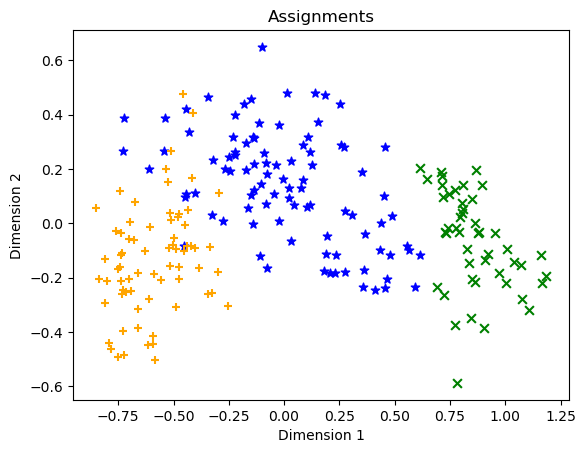

In [28]:
# Plot the output from the agglomerative clustering
plot_clusters(features_2d, agg_clusters)
